In [37]:
import eia
import os
import datetime
import pandas as pd
import json
import numpy as np
import requests
import quandl
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
from pathlib import Path
import matplotlib.pyplot as plts
import hvplot.pandas 
pn.extension("plotly")

In [38]:
mydata = quandl.get("EIA/PET_RWTC_D")

In [39]:
mydata.tail()

,Value
Date,
2020-04-28,12.40
2020-04-29,15.04
2020-04-30,19.23
2020-05-01,19.72
2020-05-04,20.47


In [40]:
mydata = quandl.get("EIA/PET_RWTC_D", collapse="monthly")

In [41]:
mydata.head()

,Value
Date,
1986-01-31,18.95
1986-02-28,13.23
1986-03-31,10.25
1986-04-30,13.38
1986-05-31,14.30


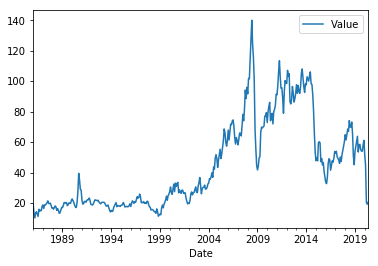

In [42]:
mydata.plot(kind='line')

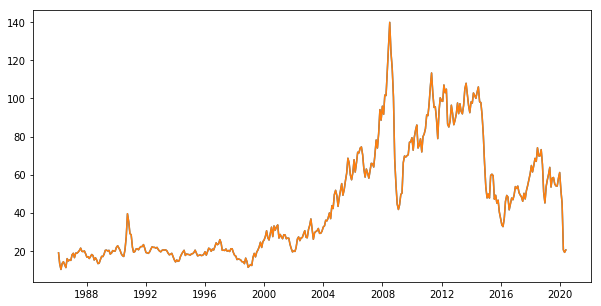

In [43]:
import matplotlib.pyplot as plts

plts.figure(figsize=(10,5))
plts.plot(mydata['Value'])
plts.plot(mydata['Value'])

In [44]:
import hvplot.pandas
from pathlib import Path
#mydata.hvplot.line()

In [45]:
#px.scatter(mydata)

In [46]:
daily_returns = mydata.pct_change()
daily_returns.head()

,Value
Date,
1986-01-31,NaN
1986-02-28,-0.301847
1986-03-31,-0.225246
1986-04-30,0.305366
1986-05-31,0.068759


In [47]:
avg_daily_return = daily_returns.mean()['Value']
avg_daily_return

0.005418119446889139

In [48]:
std_dev_daily_return = daily_returns.std()['Value']
std_dev_daily_return

0.10083454491190819

In [7]:
#COVID Data Set
# Reading and cleaning data
covid_data = Path('daily.csv')
c_df = pd.read_csv(covid_data, parse_dates=['date'])

In [8]:
c_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-05-08,56,1275916,7132872.0,3307.0,47718.0,142037.0,11780.0,6294.0,6788.0,...,142037.0,8412095,8408788,8408788,NaN,1760.0,6861.0,275496.0,27779.0,303275.0
1,2020-05-07,56,1248137,6857376.0,3171.0,49130.0,135176.0,12137.0,5174.0,7070.0,...,135176.0,8108684,8105513,8105513,NaN,2746.0,3699.0,291140.0,27580.0,318720.0
2,2020-05-06,56,1220557,6566236.0,2742.0,50227.0,131477.0,9380.0,4911.0,4753.0,...,131477.0,7789535,7786793,7786793,NaN,1949.0,2120.0,217513.0,24952.0,242465.0
3,2020-05-05,56,1195605,6348723.0,2633.0,50906.0,129357.0,9348.0,4794.0,4818.0,...,129357.0,7546961,7544328,7544328,NaN,2527.0,1960.0,236802.0,22152.0,258954.0
4,2020-05-04,56,1173453,6111921.0,2791.0,50062.0,127397.0,9366.0,4579.0,4848.0,...,127397.0,7288165,7285374,7285374,NaN,912.0,1601.0,210561.0,21447.0,232008.0


In [9]:
c_df.tail()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
103,2020-01-26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
104,2020-01-25,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
105,2020-01-24,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
106,2020-01-23,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
107,2020-01-22,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
c_df.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'],
      dtype='object')

In [11]:
#c_df['date'] = pd.to_datetime(c_df['date'])   
#c_df.set_index('date',inplace=True)

In [12]:
#new_df = c_df.drop(['states','negative', 'pending','hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative',
       #'recovered','hash','dateChecked','death','hospitalized','total',
       #'totalTestResults','posNeg','fips','deathIncrease',
       #'hospitalizedIncrease','negativeIncrease','positiveIncrease',
       #'totalTestResultsIncrease'], axis=1)

In [13]:
#new_df.head()

In [14]:

#new_df['date'] = pd.to_datetime(new_df['date'])
#new_df.set_index('date',inplace=True)
#new_df.set_index('date', inplace=True, drop=False)
#new_df = new_df.set_index(pd.DatetimeIndex(new_df['date']))
#formatted_df = new_df["date"].dt.strftime("%y/%m/%d")
#c_df['date'] = pd.to_datetime(c_df['date'])
#c_df = c_df.set_index('date')
#new_df = c_df[['date','positive']]


In [15]:
#new_df.plot.line(rot=0,title='COVID Cases', figsize=(15,10), fontsize=12)
#c_df['date'] = pd.to_datetime(c_df.date)
#c_df.set_index('date', inplace=True)

In [16]:
c_df.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'],
      dtype='object')

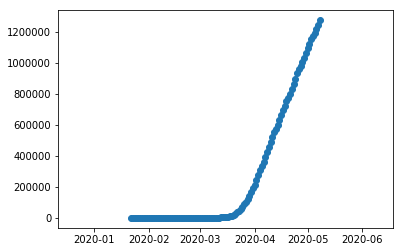

In [17]:
x = plts.scatter(c_df['date'], c_df['positive'])

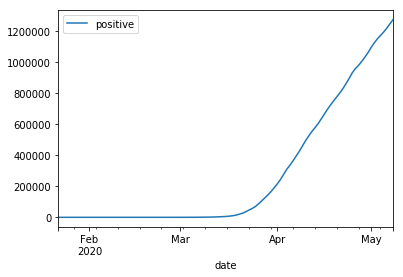

In [19]:
c_df.plot(x='date',y='positive') 

In [120]:
c_df.hvplot(x='date',y='positive', title='COVID-19 Infections in the U.S')

:Curve   [date]   (positive)

In [35]:
mydata.hvplot(groupby=['index.year'], widget_type='scrubber', widget_location='bottom') 

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=34, width=550)
        [2] HSpacer()

In [53]:
saudi_df = quandl.get("EIA/STEO_COPR_SA_M")

In [54]:
saudi_df.tail()

,Value
Date,
2019-12-31,9.75
2020-01-31,9.85
2020-02-29,9.75
2020-03-31,9.80
2020-04-30,11.60


In [55]:
saudi_df.head()

,Value
Date,
1994-01-31,8.068335
1994-02-28,8.060858
1994-03-31,8.068335
1994-04-30,8.083288
1994-05-31,8.063351


In [118]:
saudi_df.hvplot(xlabel='Date', ylabel='Barrels (millions)',title='Crude Oil Production, Saudi Arabia, Yearly')

:Curve   [Date]   (Value)

In [113]:
saudi_df.hvplot?

In [122]:
saudi_df.loc[saudi_df.index>'2019-11-01'].hvplot(title='Crude Oil Production, Saudi Arabia, Monthly', ylabel='Barrels (millions)',ylim=(9.5,12))

:Curve   [Date]   (Value)

In [112]:
c_df.hvplot(x='date',y='positive') + mydata.loc[mydata.index>'2019-11-01'].hvplot(title="WTI Crude Oil Price Per Barrel") + saudi_df.loc[saudi_df.index>'2019-11-01'].hvplot(title='Crude Oil Production, Saudi Arabia, Monthly',ylim=(9.5,12))

:Layout
   .Curve.I   :Curve   [date]   (positive)
   .Curve.II  :Curve   [Date]   (Value)
   .Curve.III :Curve   [Date]   (Value)

In [79]:
#saudi_df.hvplot(x='Date',y='Value',groupby='Value',kind='line')

In [121]:
mydata.loc[mydata.index>'2019-11-01'].hvplot(title="WTI Crude Oil Price Per Barrel", ylabel='Price Per Barrel - USD') 

:Curve   [Date]   (Value)